In [2]:
from bisr_dpw.dpw_interface import solve_dpw
from bisr_dpw.barriers_py3 import ssrandom

n = 100
theta = 1
unpaired_weight = 0.3

In [3]:
from rna_barrier_subtree_solver.utilities import filter_common_bps, list_bps
from rna_barrier_subtree_solver.subtree_solver import neighbor_dict, delete_bp

In [4]:
s1 = ssrandom(n, {}, theta=theta, unpaired_weight=unpaired_weight, seed=2020)
s2 = ssrandom(n, {}, theta=theta, unpaired_weight=unpaired_weight, seed=2023)
s1, s2 = filter_common_bps(s1,s2)
print(s1)
print(s2)

(.((((((((.)(((.(((((..((.(((.)..)))))...).)).(.)))(((.))).)))(((((((.)))))))))(.)))(..(.)((.)).))))
(((((((.))))(((.)))(.)..((((.((.))))))(.((((((((..(.)).))))))(.)))(.))))((.((.((((.((.))).)))))(.)))


In [5]:
k2, schedule = solve_dpw(s1, s2)
print(schedule)

[((84, 96), (84, 86)), ((28, 30), (30, 32)), ((27, 33), (29, 33)), ((26, 34), (27, 34)), ((24, 35), (26, 35)), (78, (25, 36)), ((23, 36), (24, 37)), ((20, 37), (19, 21)), (79, (95, 97)), ((16, 49), (14, 16)), ((52, 56), (50, 52)), ((51, 57), (45, 56)), ((17, 44), (44, 57)), ((18, 43), (43, 58)), ((13, 59), (13, 17)), ((14, 50), (42, 59)), ((12, 60), (12, 18)), ((19, 41), (41, 60)), ((87, 89), (81, 88)), ((4, 83), (83, 87)), ((79, 81), (80, 90)), ((90, 94), (79, 91)), ((91, 93), (78, 92)), ((6, 78), (6, 8)), ((9, 11), (5, 9)), ((7, 77), (4, 10)), ((3, 97), (3, 11)), ((5, 82), (76, 93)), ((63, 75), (61, 63)), ((62, 76), (75, 94)), ((64, 74), (40, 64)), ((8, 61), (38, 65)), ((2, 98), (73, 98)), ((67, 71), (1, 70)), ((65, 73), (2, 69)), ((68, 70), (66, 68)), ((66, 72), (72, 99)), ((0, 99), (0, 71)), ((46, 48), (47, 53)), ((53, 55), (46, 55))]


In [6]:
from colorama import Back, Fore
def color_map(s, next_bp=None):
    new_s = ""
    for k,c in enumerate(s):
        if next_bp:
            i,j=next_bp
            if k==i or k==j:
                new_s += Back.YELLOW+c+Back.RESET
                continue
        if c=='(' or c==')':
            new_s += Back.CYAN+c+Back.RESET
        elif c=='[' or c==']':
            new_s += Back.RED+c+Back.RESET
        else:
            new_s += c
    return new_s

[(6, 8), (5, 9), (4, 10), (3, 11), (14, 16), (13, 17), (12, 18), (19, 21), (30, 32), (29, 33), (27, 34), (26, 35), (25, 36), (24, 37), (50, 52), (47, 53), (46, 55), (45, 56), (44, 57), (43, 58), (42, 59), (41, 60), (61, 63), (40, 64), (38, 65), (66, 68), (2, 69), (1, 70), (0, 71), (84, 86), (83, 87), (81, 88), (80, 90), (79, 91), (78, 92), (76, 93), (75, 94), (95, 97), (73, 98), (72, 99)]
(.((((((((.)(((.(((((..((.(((.)..)))))...).)).(.)))(((.))).)))(((((((.)))))))))(.)))(..(.)((.)).))))
(.((((((((.)(((.(((((..((.(((.)..)))))...).)).(.)))(((.))).)))(((((((.)))))))))(.)))...(.)((.))..)))
(.((((((((.)(((.(((((..((.(((.)..)))))...).)).(.)))(((.))).)))(((((((.)))))))))(.)))[.](.)((.))..)))
(.((((((((.)(((.(((((..((.((.....)))))...).)).(.)))(((.))).)))(((((((.)))))))))(.)))[.](.)((.))..)))
(.((((((((.)(((.(((((..((.((..[.])))))...).)).(.)))(((.))).)))(((((((.)))))))))(.)))[.](.)((.))..)))
(.((((((((.)(((.(((((..((.(...[.].))))...).)).(.)))(((.))).)))(((((((.)))))))))(.)))[.](.)((.))..)))
(.

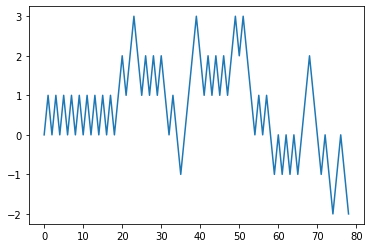

In [7]:
N = neighbor_dict(s1,s2)
already_lifted = set([])
current_s = s1
print(list_bps(s2))
print(color_map(s1))

#print(N)
ys = [0]
cumul = 0
for bp1, bp2 in schedule:
    if bp2 in list_bps(s2):
        for pred in set(N[bp2])-already_lifted:
            cumul += 1
            ys.append(cumul)
            already_lifted.add(pred)
            current_s = delete_bp(current_s, pred)
            print(color_map(current_s, next_bp=bp2))
        cumul -= 1
        current_s = list(current_s)
        current_s[bp2[0]] = '['
        current_s[bp2[1]] = ']'
        current_s = "".join(current_s)
        print(color_map(current_s))
        ys.append(cumul)

import matplotlib.pylab as plt
plt.plot(range(len(ys)),ys)